In [1]:
import pandas as pd

In [2]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


Analyze the ufo sightings by year or time of day.

In [3]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [5]:
# Though not a good approach observe the use of pd.series.str.slice(-5,-3)
ufo.Time.str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

Better way to do is to convert time column to pandas special day time format.

In [6]:
ufo['Time'] = pd.to_datetime(ufo.Time)

Using [Pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) : Convert argument to datetime.

In [7]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


The formatting looks the same but the real thing that changed is the dtype of ufo['Time'].

In [8]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [10]:
ufo.Time.dtypes

dtype('<M8[ns]')

## Observe with pandas we did not had to tell the format in which the year has been given it figured it out automatically. 

If it did not give that correctly, you can always mention the format as an argument.

#### Benefits of this datetime, it gives us some convenient attributes.

In [12]:
ufo['Time'].dt.hour[1:5]

1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [13]:
ufo['Time'].dt.date[1:5]

1    1930-06-30
2    1931-02-15
3    1931-06-01
4    1933-04-18
Name: Time, dtype: object

In [14]:
ufo['Time'].dt.quarter[1:5]

1    2
2    1
3    2
4    2
Name: Time, dtype: int64

In [16]:
ufo['Time'].dt.time[1:5]

1    20:00:00
2    14:00:00
3    13:00:00
4    19:00:00
Name: Time, dtype: object

In [17]:
ufo['Time'].dt.hour[1:5]

1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [18]:
ufo['Time'].dt.weekday_name[1:7]

1      Monday
2      Sunday
3      Monday
4     Tuesday
5    Saturday
6    Saturday
Name: Time, dtype: object

In [19]:
ufo['Time'].dt.weekday[1:7]

1    0
2    6
3    0
4    1
5    5
6    5
Name: Time, dtype: int64

In [20]:
ufo['Time'].dt.dayofyear[1:7]

1    181
2     46
3    152
4    108
5    258
6    166
Name: Time, dtype: int64

When passing this string __1/1/1999__ to a pandas.to_datetime(), it outputs a timestamp.

In [21]:
pd.to_datetime('1/1/1999')

Timestamp('1999-01-01 00:00:00')

Observe the format of the string is different from that of the resulting format. Pandas figured it out.

In [22]:
ts = pd.to_datetime('1/1/1999')

We can also use this for comparison. And we get all the dates after 1/1/1999.

In [24]:
ufo.loc[ufo.Time >= ts, :].head(10)

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
12837,DeWitt,NaN,LIGHT,AR,1999-01-01 18:00:00
12838,Bainbridge Island,NaN,NaN,WA,1999-01-01 19:12:00
12839,Camano Island,NaN,FIREBALL,WA,1999-01-01 19:30:00
12840,Cheaha Mountain,NaN,TRIANGLE,AL,1999-01-01 21:00:00
12841,Coyoty Canyon,NaN,DISK,NM,1999-01-01 21:00:00


We can also do mathematical operations with datetime format.

In [26]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [27]:
ufo.Time.min()

Timestamp('1930-06-01 22:00:00')

In [28]:
(ufo.Time.max() - ufo.Time.min())

Timedelta('25781 days 01:59:00')

So the subtraction results in a __Timedelta object__ and you can also pull attributes like this.

In [29]:
(ufo.Time.max() - ufo.Time.min()).days

25781

#### Plotting number of UFO reports by year

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
ufo['Year'] = ufo.Time.dt.year

In [33]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


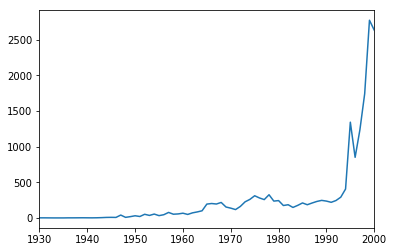

In [35]:
ufo.Year.value_counts().sort_index().plot();